In [ ]:
# Практика 12.1.2

In [ ]:
import pandas as pd
import numpy as np
import scipy
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
#keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

#from tensorflow.python.keras.optimizer import Adam, RMSprop

from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
###Подготовка данных
# загрузка данных из mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

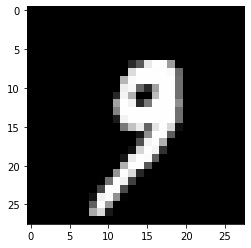

In [ ]:
#смотрим случайное изображение
plt.imshow(Image.fromarray(x_test_org[1000]).convert('RGBA'))
plt.show


In [ ]:
#Примечание размер изображения 28х28 пикселей (всего пикселей 784)

In [ ]:
### Преобразование данных
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [ ]:
#нормализация данных
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test  = x_test / 255

In [ ]:
#кодирование через OneHotEncoder
y_train = utils.to_categorical(y_train_org, 10) #10 - кол-во классов
y_test = utils.to_categorical(y_test_org, 10)
y_test[888]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
###Нейронная сеть для множественной классификации
#модель
model = Sequential()
#слои
model.add(Dense(400, input_dim = 784, activation = 'relu'))
model.add(Dropout(0.2)) #слой позволяет бороться с переобучением
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))


Epoch 1/30
120/120 [==============================] - 3s 11ms/step - loss: 0.4937 - accuracy: 0.8547 - val_loss: 0.2026 - val_accuracy: 0.9405
Epoch 2/30
120/120 [==============================] - 1s 10ms/step - loss: 0.1869 - accuracy: 0.9446 - val_loss: 0.1506 - val_accuracy: 0.9560
Epoch 3/30
120/120 [==============================] - 1s 9ms/step - loss: 0.1283 - accuracy: 0.9612 - val_loss: 0.1251 - val_accuracy: 0.9627
Epoch 4/30
120/120 [==============================] - 1s 9ms/step - loss: 0.0991 - accuracy: 0.9706 - val_loss: 0.1136 - val_accuracy: 0.9664
Epoch 5/30
120/120 [==============================] - 1s 9ms/step - loss: 0.0775 - accuracy: 0.9769 - val_loss: 0.1131 - val_accuracy: 0.9660
Epoch 6/30
120/120 [==============================] - 1s 10ms/step - loss: 0.0607 - accuracy: 0.9811 - val_loss: 0.1032 - val_accuracy: 0.9698
Epoch 7/30
120/120 [==============================] - 1s 10ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0971 - val_accuracy: 0.9717
Ep

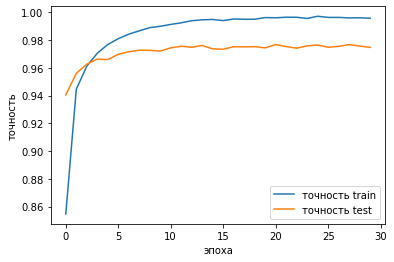

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
n=30000 # размер выборки которая подается для обучения

#визуализация
history = model.fit(x_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (x_train[n:], y_train[n:]),
                    verbose = 1)

plt.plot(history.history['accuracy'],
         label = 'точность train')
plt.plot(history.history['val_accuracy'],
        label = 'точность test')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend()
plt.show()

In [ ]:
###Решение с помощью сверточной нейросети

In [ ]:
import pandas as pd
import numpy as np
import scipy
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
#keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

#from tensorflow.python.keras.optimizer import Adam, RMSprop

from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
###Подготовка данных
# загрузка данных из mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [ ]:
#кодирование через OneHotEncoder
y_train = utils.to_categorical(y_train_org, 10) #10 - кол-во классов
y_test = utils.to_categorical(y_test_org, 10)
y_test[888]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#преобразование данных
x_train = x_train.reshape(x_train_org.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test_org.shape[0], 28, 28, 1)

In [ ]:
#нейройнная сеть
model = Sequential()
#слои
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
'''Входной слой в котором:
32-глубина, (3,3) размер рамки картинки, padding добавляет дополнительный пиксель для лучшего захвата'''
model.add(MaxPooling2D(pool_size = (2,2))) #слой извлечет основные признаки и преобразует до окошка 2 на 2
model.add(Flatten()) #преобразование в векторный вид
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2)) #слой позволяет бороться с переобучением
model.add(Dense(10, activation = 'softmax'))

Epoch 1/30
120/120 [==============================] - 8s 63ms/step - loss: 0.4998 - accuracy: 0.8572 - val_loss: 0.2068 - val_accuracy: 0.9399
Epoch 2/30
120/120 [==============================] - 7s 61ms/step - loss: 0.1822 - accuracy: 0.9457 - val_loss: 0.1269 - val_accuracy: 0.9639
Epoch 3/30
120/120 [==============================] - 7s 61ms/step - loss: 0.1155 - accuracy: 0.9661 - val_loss: 0.0981 - val_accuracy: 0.9715
Epoch 4/30
120/120 [==============================] - 7s 61ms/step - loss: 0.0826 - accuracy: 0.9767 - val_loss: 0.0805 - val_accuracy: 0.9765
Epoch 5/30
120/120 [==============================] - 7s 62ms/step - loss: 0.0658 - accuracy: 0.9803 - val_loss: 0.0741 - val_accuracy: 0.9777
Epoch 6/30
120/120 [==============================] - 7s 62ms/step - loss: 0.0532 - accuracy: 0.9851 - val_loss: 0.0695 - val_accuracy: 0.9783
Epoch 7/30
120/120 [==============================] - 7s 62ms/step - loss: 0.0448 - accuracy: 0.9870 - val_loss: 0.0628 - val_accuracy: 0.9802

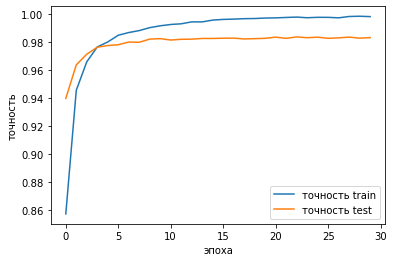

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
n=30000 # размер выборки которая подается для обучения

#визуализация
history = model.fit(x_train[:n],
                    y_train[:n],
                    batch_size = 250,
                    epochs = 30,
                    validation_data = (x_train[n:], y_train[n:]),
                    verbose = 1)

plt.plot(history.history['accuracy'],
         label = 'точность train')
plt.plot(history.history['val_accuracy'],
        label = 'точность test')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend()
plt.show()